In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading resume skills csv

In [6]:
#path of csv with all skills
path='/content/drive/MyDrive/Colab Notebooks/resume skills - assessment/CsvFiles/skills_final.csv'
skills_df=pd.read_csv(path)

In [7]:
skills_df.head()

,id,category,tokens,skills,skills_count_final
0,10554236,ACCOUNTANT,"accountant,summary,financial,accountant,specia...","document processing,deliver,data,safety,manage...",41
1,10674770,ACCOUNTANT,"staff,accountant,summary,highly,analytical,det...","advertising,word,design,data,financial,materia...",17
2,11163645,ACCOUNTANT,"accountant,professional,summary,obtain,positio...","business,word,payments,data,communications,wor...",13
3,11759079,ACCOUNTANT,"senior,accountant,experience,company,june,curr...","business,active,supervise,data,financial,accou...",11
4,12065211,ACCOUNTANT,"senior,accountant,professional,summary,senior,...","communication,schedule,financial,mode,material...",16


In [8]:
skills_df.dropna(inplace=True)

countplot for skills_count

In [9]:
import seaborn as s

In [11]:
skills_df['skills_count_final'].values

array([41, 17, 13, ..., 18, 12, 16])

<Axes: xlabel='skills_count_final', ylabel='count'>

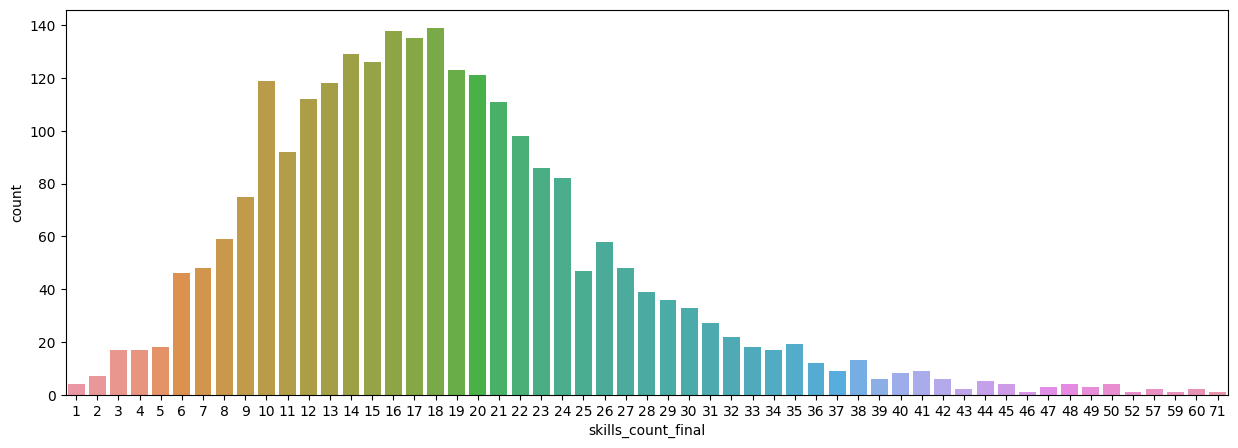

In [13]:
plt.figure(figsize=(15,5))
s.countplot(x='skills_count_final',data=skills_df)

* majority resumes have skills - (10-17)
* deleting resumes with skills less than 10

In [14]:
skills_df.shape

(2480, 5)

In [15]:
skills_df=skills_df[(skills_df['skills_count_final']>=10)]

In [16]:
skills_df.shape

(2189, 5)

In [17]:
skills_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2471, 2472, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482],
           dtype='int64', length=2189)

changing index to (0-2189)

In [18]:
skills_df.index=pd.Series(np.arange(0,len(skills_df)))

In [19]:
skills_df.index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188],
           dtype='int64', length=2189)

save the csv file

In [20]:
skills_df.to_csv('/content/drive/MyDrive/Colab Notebooks/resume skills - assessment/CsvFiles/df_skills_less.csv',index=False)

loading job description csv file

In [21]:
job_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resume skills - assessment/CsvFiles/job_df.csv')
job_df.head()

,job_description,position_title,tokens,skills,skills_count
0,were not looking for rockstars zombies or magi...,Software Developer,"looking,rockstars,zombies,magicians,looking,mo...","schedules,support,javascript,business,vision,r...",373
1,at remoteteamcom we are building an hr tool fo...,Software Developer,"remoteteamcom,building,hr,tool,companies,remot...","business,ability,think,engineering,ruby,react,...",127
2,tldr\n\nhighimpact software development jobs f...,Software Engineer,"tldr,highimpact,software,development,jobs,smar...","ability,software engineering,marathon,library,...",316
3,description hughes private capital in business...,Software Engineer,"description,hughes,private,capital,business,fa...","release,engineering,throughput,bash,support,ja...",696
4,about bethany\n\nfor years bethany has been i...,Registered Nurse (RN-CA02-007),"bethany,years,bethany,improving,lives,alberta,...","learner,ability,certificate,leadership,deliver...",444




*   gather all skills in the two dataframes separatley
*   get word vectors of each word from spacy library
*   store then in a dict






all skills

In [22]:
res_skills=set()
for i in range(len(skills_df)):
    for skill in skills_df.loc[i]['skills'].split(','):
        res_skills.add(skill)




In [23]:
res_skills=list(res_skills)

In [24]:
job_skills=set()

for i in range(len(job_df)):
    for skill in job_df.loc[i]['skills']:
        if skill.isalpha():
            job_skills.add(skill)

In [25]:
job_skills=list(job_skills)

loading spacy model

In [ ]:
!python -m spacy download en_core_web_lg

In [28]:
import spacy
nlp = spacy.load("en_core_web_lg")

checking all words has vectors

In [29]:
count=0

for i in res_skills:
    doc=nlp(i)
    #count if token has no vector
    if not doc[0].has_vector:
        # print(doc[0])
        count+=1

count

20

In [31]:
count=0
for i in job_skills:
    doc=nlp(i)
    #count if token has no vector
    if not doc[0].has_vector:
        count+=1


count

0

**some  tokens didnt have vector.we will skip those words**


* store vectors in dictionary

In [32]:
w2v_dict={}
for i in res_skills:
    doc=nlp(i)
    if doc[0].has_vector:
        w2v_dict[doc[0].text]=doc[0].vector


In [33]:
for i in job_skills:
    doc=nlp(i)
    w2v_dict[doc[0].text]=doc[0].vector

both list may have common words

In [34]:
len(w2v_dict.keys())

639

In [35]:
vec_set=set()
for i in w2v_dict.keys():
    vec_set.add(i)


**getting a word vector for a compelete skills in df row**

---



In [36]:
from sklearn.preprocessing import normalize
def get_word_vec(tokens):
    tokens=tokens.split(',')
    vecs=[]
    for i in tokens:
        if i.isalpha() and i in vec_set:
            vecs.append(w2v_dict[i])
    vecs=np.array(vecs)

    #average all the vectors
    vector=np.mean(vecs, axis=0)

    #normalise
    vector=normalize([vector])

    return vector

In [41]:
skills_df.head()

,id,category,tokens,skills,skills_count_final
0,10554236,ACCOUNTANT,"accountant,summary,financial,accountant,specia...","document processing,deliver,data,safety,manage...",41
1,10674770,ACCOUNTANT,"staff,accountant,summary,highly,analytical,det...","advertising,word,design,data,financial,materia...",17
2,11163645,ACCOUNTANT,"accountant,professional,summary,obtain,positio...","business,word,payments,data,communications,wor...",13
3,11759079,ACCOUNTANT,"senior,accountant,experience,company,june,curr...","business,active,supervise,data,financial,accou...",11
4,12065211,ACCOUNTANT,"senior,accountant,professional,summary,senior,...","communication,schedule,financial,mode,material...",16


In [ ]:
skills_df['vector']=skills_df['skills'].apply(get_word_vec)

In [43]:
job_df['vector']=job_df['skills'].apply(get_word_vec)

In [44]:
skills_df.head()

,id,category,tokens,skills,skills_count_final,vector
0,10554236,ACCOUNTANT,"accountant,summary,financial,accountant,specia...","document processing,deliver,data,safety,manage...",41,"[[0.0027420137561664113, -0.013751443781116368..."
1,10674770,ACCOUNTANT,"staff,accountant,summary,highly,analytical,det...","advertising,word,design,data,financial,materia...",17,"[[0.01251316914111992, -0.03707020399815798, -..."
2,11163645,ACCOUNTANT,"accountant,professional,summary,obtain,positio...","business,word,payments,data,communications,wor...",13,"[[0.024188286078140886, -0.020726093157528314,..."
3,11759079,ACCOUNTANT,"senior,accountant,experience,company,june,curr...","business,active,supervise,data,financial,accou...",11,"[[0.029091172697413518, -0.011098296967892234,..."
4,12065211,ACCOUNTANT,"senior,accountant,professional,summary,senior,...","communication,schedule,financial,mode,material...",16,"[[-0.0018915067819808924, -0.01959558898225991..."


In [45]:
job_df.head()

,job_description,position_title,tokens,skills,skills_count,vector
0,were not looking for rockstars zombies or magi...,Software Developer,"looking,rockstars,zombies,magicians,looking,mo...","schedules,support,javascript,business,vision,r...",373,"[[0.010101849790148333, -0.013905233316643758,..."
1,at remoteteamcom we are building an hr tool fo...,Software Developer,"remoteteamcom,building,hr,tool,companies,remot...","business,ability,think,engineering,ruby,react,...",127,"[[0.010572671194335106, 0.011492828042972345, ..."
2,tldr\n\nhighimpact software development jobs f...,Software Engineer,"tldr,highimpact,software,development,jobs,smar...","ability,software engineering,marathon,library,...",316,"[[-0.0021425193174346856, -0.01544674006079367..."
3,description hughes private capital in business...,Software Engineer,"description,hughes,private,capital,business,fa...","release,engineering,throughput,bash,support,ja...",696,"[[-0.005407445769520158, 0.016281722462883966,..."
4,about bethany\n\nfor years bethany has been i...,Registered Nurse (RN-CA02-007),"bethany,years,bethany,improving,lives,alberta,...","learner,ability,certificate,leadership,deliver...",444,"[[-0.0007068017429046415, 0.009518159467024117..."




*   we have the vectors
*   finding cosine similarity
*   getting top 5 resume id's



In [47]:
from sklearn.metrics.pairwise import cosine_similarity

def get_top_5():
    top_five=[]
    for i in range(len(job_df)):
        all_res_score=[]

        for j in range(len(skills_df)):
            cs=cosine_similarity(job_df.loc[i]['vector'],skills_df.loc[i]['vector'])

            #add score and resume id
            all_res_score.append((round(cs[0][0],5),skills_df.loc[i]['id']))

        #sorting based on score in decreasing order
        all_res_score.sort(key=lambda x:x[0],reverse=True)

        top_five.append(all_res_score[:5])

    return top_five


In [48]:
results=get_top_5()

In [50]:
results[:2]

[[(0.9502, 10554236),
  (0.9502, 10554236),
  (0.9502, 10554236),
  (0.9502, 10554236),
  (0.9502, 10554236)],
 [(0.88259, 10674770),
  (0.88259, 10674770),
  (0.88259, 10674770),
  (0.88259, 10674770),
  (0.88259, 10674770)]]

making a results csv

In [59]:
main_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resume skills - assessment/CsvFiles/main_df.csv')
main_df.head()

,id,number_of_pages,text,category,job_role
0,10554236,5,\nACCOUNTANT\nSummary\nFinancial Accountant sp...,ACCOUNTANT,ACCOUNTANT
1,10674770,2,\nSTAFF ACCOUNTANT\nSummary\nHighly analytical...,ACCOUNTANT,STAFF ACCOUNTANT
2,11163645,2,\nACCOUNTANT\nProfessional Summary\nTo obtain ...,ACCOUNTANT,ACCOUNTANT
3,11759079,2,\nSENIOR ACCOUNTANT\nExperience\nCompany Name\...,ACCOUNTANT,SENIOR ACCOUNTANT
4,12065211,2,\nSENIOR ACCOUNTANT\nProfessional Summary\nSen...,ACCOUNTANT,SENIOR ACCOUNTANT


In [63]:
def get_jobrole_with_fileid(fid,df):

    for i in range(len(df)):
        if df.loc[i]['id']==fid:
            return df.loc[i]['job_role']
    return 'NO'

In [64]:
job_index=[]
scores=[]
file_ids=[]
job_roles=[]
for i in range(len(results)):
    for score,id in results[i]:
        job_index.append(i)
        scores.append(score)
        file_ids.append(id)
        job_roles.append(get_jobrole_with_fileid(id,main_df))




In [65]:
pos_title=[]
for i in job_index:
    pos_title.append(job_df.loc[i]['position_title'])


In [68]:
results_df=pd.DataFrame({
                    'job_index': job_index ,
                    'position_title':pos_title,
                    'score':scores,
                    'file_id':file_ids,
                    'job_role':job_roles,
                    })
results_df.head(75)

,job_index,position_title,score,file_id,job_role
0,0,Software Developer,0.95020,10554236,ACCOUNTANT
1,0,Software Developer,0.95020,10554236,ACCOUNTANT
2,0,Software Developer,0.95020,10554236,ACCOUNTANT
3,0,Software Developer,0.95020,10554236,ACCOUNTANT
4,0,Software Developer,0.95020,10554236,ACCOUNTANT
...,...,...,...,...,...
70,14,Kitchen Cleaner (Utility),0.69979,13701259,SENIOR ACCOUNTANT
71,14,Kitchen Cleaner (Utility),0.69979,13701259,SENIOR ACCOUNTANT
72,14,Kitchen Cleaner (Utility),0.69979,13701259,SENIOR ACCOUNTANT
73,14,Kitchen Cleaner (Utility),0.69979,13701259,SENIOR ACCOUNTANT


save the csv file

In [69]:
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/resume skills - assessment/CsvFiles/results.csv',index=False)